In [79]:
from config import api_key
import pandas as pd
import numpy as np
import requests 
import brewerydb as br
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [29]:
brew_data_s['Brewery ID'].value_counts()

BznahA    1
DifSi4    1
yX6twV    1
p1tFbP    1
uM2jeT    1
AqEUBQ    1
HaPdSL    1
941OaA    1
hGFVYy    1
4F7QA9    1
VEY3Xa    1
TMc6H2    1
IImUD9    1
nHLlnK    1
p3YrOa    1
q6vJUK    1
nLsoQ9    1
Name: Brewery ID, dtype: int64

In [161]:
beer_data = pd.read_csv('data/beers.csv')
brew_data = pd.read_csv('data/brewery_data.csv')
print(beer_data.head())
print(brew_data.head())

brew_data_s = brew_data[['Brewery ID','Brewery Name']]
brew_data_s['breweries'] = brew_data_s['Brewery ID']

   Unnamed: 0      id                       name                nameDisplay  \
0           0  c4f2KE           'Murican Pilsner           'Murican Pilsner   
1           1  zTTWa2                11.5° PLATO                11.5° PLATO   
2           2  zfP2fK              12th Of Never              12th Of Never   
3           3  xwYSL2       15th Anniversary Ale       15th Anniversary Ale   
4           4  UJGpVS  16 So Fine Red Wheat Wine  16 So Fine Red Wheat Wine   

    abv  styleId  year  glasswareId isOrganic breweries isRetired    status  \
0   5.5     98.0   NaN          4.0         N    nHLlnK         N  verified   
1   4.5    164.0   NaN          NaN         N    nHLlnK         N  verified   
2   5.5     25.0   NaN          NaN         N    nLsoQ9         N  verified   
3   NaN      5.0   NaN          NaN         N    TMc6H2         N  verified   
4  11.0     35.0   NaN          NaN         N    TMc6H2         N  verified   

  statusDisplay  ingredients              hops    

C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [162]:
beerbrewed = pd.merge(beer_data,brew_data_s,how = 'left',on=['breweries','breweries'])

In [164]:
beerbrewed['short_name'] =beerbrewed['Brewery Name'].str.split(n=1,expand=True)[0]

In [165]:
bb =beerbrewed['short_name'].value_counts()
x_axis = np.arange(len(bb))
beerbrewed


,Unnamed: 0,id,name,nameDisplay,abv,styleId,year,glasswareId,isOrganic,breweries,...,status,statusDisplay,ingredients,hops,malt,misc,yeast,Brewery ID,Brewery Name,short_name
0,0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.50,98.0,NaN,4.0,N,nHLlnK,...,verified,Verified,0,NaN,NaN,NaN,NaN,nHLlnK,Sierra Nevada Brewing Company,Sierra
1,1,zTTWa2,11.5° PLATO,11.5° PLATO,4.50,164.0,NaN,NaN,N,nHLlnK,...,verified,Verified,0,NaN,NaN,NaN,NaN,nHLlnK,Sierra Nevada Brewing Company,Sierra
2,2,zfP2fK,12th Of Never,12th Of Never,5.50,25.0,NaN,NaN,N,nLsoQ9,...,verified,Verified,0,NaN,NaN,NaN,NaN,nLsoQ9,Lagunitas Brewing Company,Lagunitas
3,3,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,5.0,NaN,NaN,N,TMc6H2,...,verified,Verified,2,22;24;26;11;157;,247;650;,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater
4,4,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11.00,35.0,NaN,NaN,N,TMc6H2,...,verified,Verified,1,4;11;86;157;,NaN,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater
5,5,vz5JZ1,1794 The Fergal Project,1794 The Fergal Project,4.50,42.0,NaN,NaN,N,DifSi4,...,verified,Verified,0,NaN,NaN,NaN,NaN,DifSi4,Wachusett Brewing Company,Wachusett
6,6,LcpeBb,17th Saison,17th Saison,9.00,72.0,NaN,NaN,N,TMc6H2,...,verified,Verified,2,4;24;45;113;,NaN,NaN,1872;,TMc6H2,SweetWater Brewing Company,SweetWater
7,7,Yd8G8r,18th Anniversary Belgian Tripel,18th Anniversary Belgian Tripel,10.00,59.0,NaN,NaN,N,TMc6H2,...,verified,Verified,2,4;24;130;,NaN,NaN,1845;,TMc6H2,SweetWater Brewing Company,SweetWater
8,8,iJ329Y,19 - Golden Belgian Style Ale,19 - Golden Belgian Style Ale,7.00,135.0,NaN,NaN,N,TMc6H2,...,verified,Verified,0,NaN,NaN,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater
9,9,O78ldO,1904 American Red Lager,1904 American Red Lager,5.00,93.0,NaN,NaN,N,BznahA,...,verified,Verified,0,NaN,NaN,NaN,NaN,BznahA,Anheuser-Busch InBev,Anheuser-Busch


In [166]:
plt.bar(x_axis,bb)
xlabel = beerbrewed['short_name']

In [167]:
bb[0:7].values

array([286, 124, 102,  92,  80,  74,  72], dtype=int64)

In [168]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

def image_plot(heights, images, spacing=0):
    # Iterate through images and data, autoscaling the width to
    # the aspect ratio of the image
    for i, (height, img) in enumerate(zip(heights, images)):
        AR = img.shape[1] / img.shape[0]
        width = 200 #height * AR
        left = width*i + spacing*i
        right = left + width
        plt.imshow(img, extent=[left, right, 0, height])
    # Set x,y limits on plot window
    plt.xlim(0, right)
    plt.ylim(0, max(heights)*1.1)

In [114]:
sierraNevada = imread('Images/sierraNevada.jpg')
inbev = imread('Images/inbev.jpg').swapaxes(0, 1)
oskar = imread('Images/oskarBrew.jpg')
jack = imread('Images/jack.png')
lagun = imread('Images/lagun.png')
nH = imread('Images/newHolland.jpg')
sweet = imread('Images/sweetwater.jpg')

C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after remov

In [169]:
images = [sierraNevada, oskar, nH, lagun, sweet, jack, inbev]


In [171]:
xt = np.arange(100, 1400,200)
xl = bb.index[0:7]

<IPython.core.display.Javascript object>


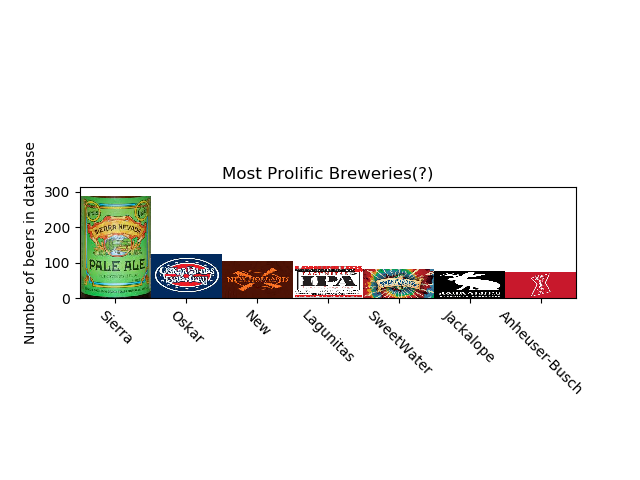

Text(0.5,1,'Most Prolific Breweries(?)')

In [172]:
image_plot(bb[0:7].values,images)
plt.xticks(xt,xl,rotation=-45)
plt.ylabel('Number of beers in database')
plt.title('Most Prolific Breweries(?)')
#plt.xticks()

In [113]:
beerbrewed.groupby('Brewery Name').count()

,Unnamed: 0,id,name,nameDisplay,abv,styleId,year,glasswareId,isOrganic,breweries,isRetired,status,statusDisplay,ingredients,hops,malt,misc,yeast,Brewery ID
Brewery Name,,,,,,,,,,,,,,,,,,,
Anheuser-Busch InBev,72,72,72,72,69,72,0,25,72,72,72,72,72,72,0,12,2,0,72
Breckenridge Brewery,66,66,66,66,58,66,2,17,66,66,66,66,66,66,2,1,1,1,66
Brouwerij De Leite,6,6,6,6,6,6,0,0,6,6,6,6,6,6,0,0,0,0,6
Dock Street Brewery,21,21,21,21,19,21,0,2,21,21,21,21,21,21,0,0,0,0,21
Guinness,26,26,26,26,26,26,0,12,26,26,26,26,26,26,2,1,0,0,26
Jackalope Brewing Company,74,74,74,74,37,74,0,1,74,74,74,74,74,74,0,0,0,0,74
Lagunitas Brewing Company,92,92,92,92,92,91,0,30,92,92,92,92,92,92,0,0,1,0,92
Last Name Brewing,9,9,9,9,9,9,0,9,9,9,9,9,9,9,0,0,0,0,9
Laughing Dog Brewing,26,26,26,26,23,26,0,12,26,26,26,26,26,26,0,0,0,0,26


In [151]:
brew_names = bb[0:7].index.str.split(n=1,expand=True)[0]
brew_names

('Sierra', 'Nevada Brewing Company')

In [154]:
beerbrewed

,Unnamed: 0,id,name,nameDisplay,abv,styleId,year,glasswareId,isOrganic,breweries,...,status,statusDisplay,ingredients,hops,malt,misc,yeast,Brewery ID,Brewery Name,short_name
0,0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,98.0,NaN,4.0,N,nHLlnK,...,verified,Verified,0,NaN,NaN,NaN,NaN,nHLlnK,Sierra Nevada Brewing Company,Sierra
1,1,zTTWa2,11.5° PLATO,11.5° PLATO,4.5,164.0,NaN,NaN,N,nHLlnK,...,verified,Verified,0,NaN,NaN,NaN,NaN,nHLlnK,Sierra Nevada Brewing Company,Sierra
2,2,zfP2fK,12th Of Never,12th Of Never,5.5,25.0,NaN,NaN,N,nLsoQ9,...,verified,Verified,0,NaN,NaN,NaN,NaN,nLsoQ9,Lagunitas Brewing Company,Lagunitas
3,3,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,5.0,NaN,NaN,N,TMc6H2,...,verified,Verified,2,22;24;26;11;157;,247;650;,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater
4,4,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11.0,35.0,NaN,NaN,N,TMc6H2,...,verified,Verified,1,4;11;86;157;,NaN,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater
5,5,vz5JZ1,1794 The Fergal Project,1794 The Fergal Project,4.5,42.0,NaN,NaN,N,DifSi4,...,verified,Verified,0,NaN,NaN,NaN,NaN,DifSi4,Wachusett Brewing Company,Wachusett
6,6,LcpeBb,17th Saison,17th Saison,9.0,72.0,NaN,NaN,N,TMc6H2,...,verified,Verified,2,4;24;45;113;,NaN,NaN,1872;,TMc6H2,SweetWater Brewing Company,SweetWater
7,7,Yd8G8r,18th Anniversary Belgian Tripel,18th Anniversary Belgian Tripel,10.0,59.0,NaN,NaN,N,TMc6H2,...,verified,Verified,2,4;24;130;,NaN,NaN,1845;,TMc6H2,SweetWater Brewing Company,SweetWater
8,8,iJ329Y,19 - Golden Belgian Style Ale,19 - Golden Belgian Style Ale,7.0,135.0,NaN,NaN,N,TMc6H2,...,verified,Verified,0,NaN,NaN,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater
9,9,O78ldO,1904 American Red Lager,1904 American Red Lager,5.0,93.0,NaN,NaN,N,BznahA,...,verified,Verified,0,NaN,NaN,NaN,NaN,BznahA,Anheuser-Busch InBev,Anheuser-Busch
